<a href="https://colab.research.google.com/github/stereoyana/pandas_ds_projects/blob/main/karpov_3_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Упражнения 3 урока


Напишите функцию read_n_agg, которая:

- принимает на вход один параметр – путь к файлу
- считывает переданный файл, в котором разделителем является ;
- считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
- возвращает результат этих действий (агрегированный датафрэйм)

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_url = '/content/3_companies.csv'

In [6]:
def read_n_agg(file_url):
    data = pd.read_csv(file_url, sep=';')
    return data.groupby('company').agg({'income' : 'mean'})

In [7]:
read_n_agg(file_url)

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


Вернемся к данным по поездкам на такси! На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей! 

- journey_id – уникальный id поездки
- user_id – id пользователя
- driver_id – id водителя
- taxi_id – id машины
- icon – тип поездки
- start_type – тип заказа (asap, reserved, delayed)
- start_at – время начала поездки
- start_lat – исходное местоположение пользователя, широта
- start_lon – исходное местоположение пользователя, долгота
- end_at – время окончания поездки
- end_lat – итоговое местоположение, широта
- end_lon – итоговое местоположение, долгота
- end_state – состояние заказа
- driver_start_lat – исходное местоположение водителя, широта
- driver_start_lon – исходное местоположение водителя, долгота
- arrived_at – время прибытия водителя
- source – платформа, с которой сделан заказ
- driver_score – оценка водителя клиентом
- rider_score – оценка клиента водителем

1. Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file. 
Загрузите датасет, используя ; в качестве разделителя. 

Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
Результат запишите в переменную taxi.

In [9]:
path_to_file = '/content/3_taxi_peru.csv'

In [14]:
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [16]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


2. Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.



In [29]:
source_max = taxi.source.value_counts(normalize=True).round(2).max()

In [32]:
print('Максимальная доля платформы', source_max * 100, '%')

Максимальная доля платформы 42.0 %


3. Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts
 

Полезные функции:

.mul() – умножение, более удобный вариант для использования в цепочке методов 
.round() – округление
.reset_index() – сбросить индекс
.value_counts() – сколько раз встречается каждое значение переменной


In [47]:
driver_score_counts = taxi.driver_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'driver_score' : 'percentage', 'index' : 'driver_score'}) \
    .sort_values(by='driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


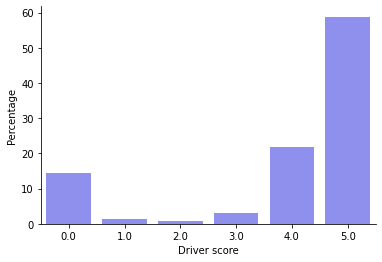

In [49]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

💀 Сложное задание! 💀

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
В чем его отличие от распределения оценок водителей?

In [53]:
rider_score_counts = taxi.rider_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'rider_score' : 'percentage', 'index' : 'rider_score'}) \
    .sort_values(by='rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


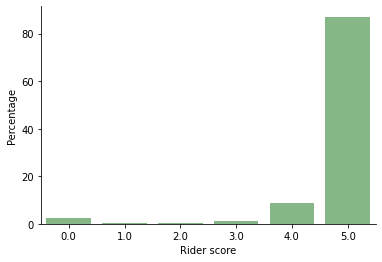

In [55]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='green', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

**Выводы**

- Более чем в 80% случаев водители поставили клиентам 5 звездочек
- Водители ставят меньше 0, чем клиенты
